# Task 3

The third task is about comparing your results with architectures developed using PyTorch. Compare the results obtained in Task 2 to the results obtained using the same architectures implemented in PyTorch. Then, propose improvements and new architectures that make use of more advanced methods (e.g. Convolutional Neural Networks, dropout). Compare the results.

Finally, present the confusion matrix of your best model.


## External Sources Used

- Pytorch documnetation: https://pytorch.org/docs/stable/torchvision/datasets.html#mnist and https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html About 8 lines of code were taken from the latter for the purposes of downloading and displaying samples from MNIST.

## Downloading the Dataset

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim 
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import util

In [2]:
# Downloading MNIST
transform = transforms.Compose(
    [transforms.ToTensor()])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=256, shuffle=False, num_workers=2)


Size of Train set is 60000
Size of Test set is 10000

Image depicts the target: 2


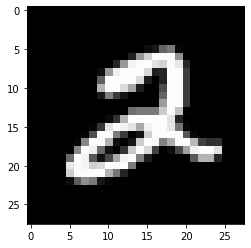

In [3]:
def display_image(image_pos=0, set=trainset):
    print(f"Image depicts the target: {set[image_pos][1]}")
    imgplot = plt.imshow(set[image_pos][0].numpy().reshape((28, 28)), cmap='gray')


print(f"\nSize of Train set is {len(trainset)}")
print(f"Size of Test set is {len(testset)}\n")

display_image(image_pos=5, set=trainset)


## The First Pytorch Network 

In [31]:
class PT_NN(nn.Module):
    def __init__(self, trainset, lr=1e-5):
        super(PT_NN, self).__init__()
        self.trainset = trainset
        self.n = self.trainset.data.numpy().shape[1] ** 2
        self.m = self.trainset.data.numpy().shape[0]
        self.layers = []
        self.layer_modules = []
        self.activations = []
        self.lr = lr
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax()
        self.loss_history = []
        self.accuracy_history = []
    
    def add_layer(self, nodes=784, activation="sigmoid"):
        number_of_layers = len(self.layers)
        if number_of_layers == 0:
            layer_to_add = nn.Linear(self.n, nodes)
            self.layers.append(layer_to_add)
            self.activations.append(activation)
        else:
            prev_layer = self.layers[number_of_layers - 1]
            layer_to_add = nn.Linear(prev_layer.out_features, nodes)
            self.layers.append(layer_to_add)
            self.activations.append(activation)
        
        self.layer_modules = nn.ModuleList(self.layers)
    
    def forward_pass(self, X):
        X = X.view(-1, 784)
        for i in range(len(self.layers)):
            # print(type(self.layer_modules[i]))
            if self.activations[i] == "sigmoid":
                X = self.sigmoid(self.layer_modules[i](X))
            if self.activations[i] == "relu":
                X = self.relu(self.layer_modules[i](X))
            if self.activations[i] == "softmax":
                X = self.softmax(self.layer_modules[i](X))
        return X
    
    def fit(self, X, epochs=10, testset=None):
        calc_loss = nn.CrossEntropyLoss()
        params = self.parameters()
        optimizer = optim.SGD(params=params, lr=self.lr,)
        loss = 0
        hx = None
        for e in range(epochs):
            print(f"\nStarting epoch {e + 1}/{epochs}.")
            for i, (X, y) in enumerate(trainloader):
                hx = self.forward_pass(X)
                loss = calc_loss(hx, y)
                loss.backward() #Calc gradients
                optimizer.step() #Update params
            loss_float = float(loss)
            self.loss_history.append(float(loss))
            print(f"Loss is {loss_float}. ", end="")
            if not testset == None:
                accuracy = self.score(testset)
                self.accuracy_history.append(accuracy)
                print(f"Accuracy is {accuracy}.\n")
        
    def plot_loss(self, ymin=None, ymax=None):
        history = self.loss_history
        if ymin == None:
            plt.ylim((min(history)), (max(history)))
        else:
            plt.ylim(ymin, ymax)
        plt.title("Loss Over Epochs")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.plot(list(range(len(history))), history)
        plt.show()
    
    def plot_accuracy(self, ymin=None, ymax=None):
        history = self.accuracy_history
        if len(history) == 0:
            print("Accuracy was not Recorded")
            return
        if ymin == None:
            plt.ylim((min(history)), (max(history)))
        else:
            plt.ylim(ymin, ymax)
        plt.title("Accuracy Over Epochs")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.plot(list(range(len(history))), history)
        plt.show()
    
    def score(self, testset):
        total_tests = len(testset.targets)
        correct_answers = 0
        for i, (X, y) in enumerate(testloader):
            predictions = self.forward_pass(X)
            predictions = predictions.detach().numpy()
            for j in range(len(predictions)):
                p = util.decode(util.encode_probabilities(predictions[j]))
                true_target = int(y[j])
                if p == true_target:
                    correct_answers += 1
        accuracy = correct_answers / total_tests
        return accuracy
        

In [32]:
pytorch_nn = PT_NN(trainset=trainset, lr=0.001)
pytorch_nn.add_layer(nodes=100, activation="sigmoid")
pytorch_nn.add_layer(nodes=60, activation="sigmoid")
pytorch_nn.add_layer(nodes=50, activation="sigmoid")
pytorch_nn.add_layer(nodes=10, activation="softmax")

In [39]:
pytorch_nn.fit(trainset, epochs=10, testset=testset)


Starting epoch 1/10.
Loss is 2.2209694385528564. Accuracy is 0.2929.


Starting epoch 2/10.
Loss is 2.136218309402466. Accuracy is 0.3047.


Starting epoch 3/10.
Loss is 2.1642327308654785. Accuracy is 0.3073.


Starting epoch 4/10.
Loss is 2.127570152282715. Accuracy is 0.3684.


Starting epoch 5/10.
Loss is 2.0451767444610596. Accuracy is 0.368.


Starting epoch 6/10.
Loss is 2.040952205657959. Accuracy is 0.3859.


Starting epoch 7/10.
Loss is 2.069953680038452. Accuracy is 0.3963.


Starting epoch 8/10.
Loss is 2.0923659801483154. Accuracy is 0.4308.


Starting epoch 9/10.
Loss is 2.03662109375. Accuracy is 0.4558.


Starting epoch 10/10.
Loss is 2.017815351486206. Accuracy is 0.4654.



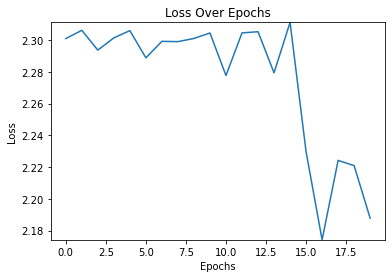

In [37]:
pytorch_nn.plot_loss()

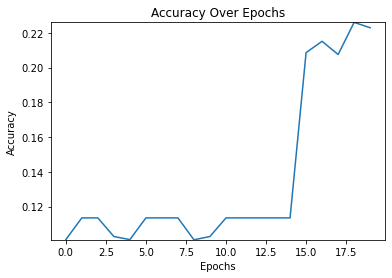

In [38]:
pytorch_nn.plot_accuracy()